# Visualizaciones MultiVariadas

In [1]:
import pandas as pd

In [2]:
#Se emplea el código de esta celda solo si se está ejecutando el código en Google Collaboratory (se emplea para obtener los datos)
#En caso de estar ejecutando el código en un equipo local, no es necesario volver a descargar los datos

#  ! git clone https://github.com/bbaruque/VisDat_Ejemplos.git
#  data_dir = "./VisDat_Ejemplos/JupyterNotebooks/data/"  

In [3]:
# En caso de haber ejecutado la celda anterior, esta debe dejarse SIN EJECUTAR
data_dir = "../../data/datos_1ªy2ªParte/"

In [4]:
df = pd.read_csv(data_dir+"FIFA18CompletePlayerDataset.csv", index_col=0)

C:\ProgramData\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
pd.set_option('max_columns', None)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

In [7]:
footballers.head(5)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


## Añadiendo más variables visuales

La forma más evidente de representar más de 2 variables es incluir en las visualizaciónes otras características visuales. Con variables o características visuales nos referimos a marcadores o dimensiones que ayuden a distinguir dos elementos de datos entre sí. Ejemplos de ello incluyen tamaño, color, forma y una, dos o incluso 3 dimensiones de posición (ejes x, y, z).

Las representaciones visuales "buenas" hacen un uso eficiente de estas características para obtener una visualización fácilmente interpretable.

## Gráficos de Dispersión Multivariados

Un ejemplo de lo anterior sería intentar representar que tipo de jugadores ofensivos tiende a ser mejor pagado: "striker", "right-winger", o "left-winger".

In [3]:
import seaborn as sns

sns.lmplot(x='Value', y='Overall', hue='Position', # como variables se indican las 3 a emplear (x, y, color)
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])], # como datos, se seleccionan solo las 3 posiciones que queremos estudiar
           fit_reg=False)

Ene ste gráfico empleamos 3 variables:
- Eje x: el valor del jugador (cuanto se paga por él).
- Eje y: el conjunto de características del jugador puntuadas ("Overall")
- Color: cada una de las 3 cateorías a comparar.

Aunque podemos ver diferencias, es complejo obtener una conclusión clara en este gráfico. En este caso, emplear un gráfico hexagonal tampoco ayudaría mucho (el color no indica variables de intervalo).

Otro ejemplo podría ser el uso de formas diferentes:

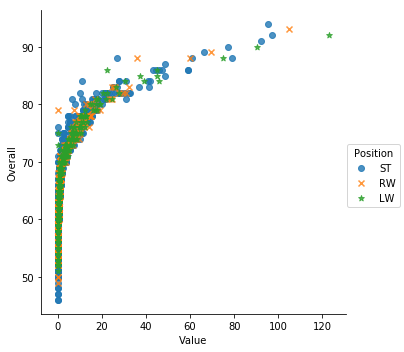

In [4]:
sns.lmplot(x='Value', y='Overall', markers=['o', 'x', '*'], hue='Position', #se indica adicionalmente la forma de cada "Position"
           data=footballers.loc[footballers['Position'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False
          )

## Gráficos de cajas agrupados

En este caso, aprovecharemos la característica de grouping o agrupamiento.

Supongamos que queremos responder a la pregunta de si los delanteros (ST) tienen mayores puntuaciones en la variable "aggression" que los porteros (GK)

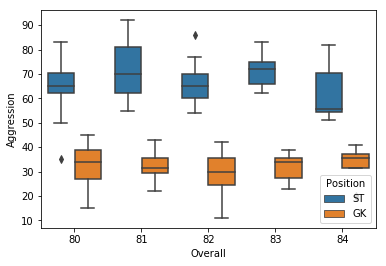

In [5]:
f = (footballers # de la tabla footballers
         .loc[footballers['Position'].isin(['ST', 'GK'])] # se selecciona por filas los jugadores delanteros y porteros
         .loc[:, ['Value', 'Overall', 'Aggression', 'Position']] # se selecciona por columnas  los valoreas a estudiar
    )
f = f[f["Overall"] >= 80] # se seleccionan solo las filas que tengan puntuación "Overall" igual o mayor a 80 
f = f[f["Overall"] < 85] # de entre ellas, se seleccionan solo las filas que tengan puntuación "Overall" menor a 85
#Esta selección se realiza simplemente para simplificar los datos de trabajo
f['Aggression'] = f['Aggression'].astype(float) # Se convierte a numero decimal (al leerlo, algunos se reconocen como cadenas)

sns.boxplot(x="Overall", y="Aggression", hue='Position', data=f) # se genera el gráfico

Se puede ver que en este conjunto de datos, los delanteros tienen claramente una mayor puntuación en el campo "Aggression" que los porteros (al menos los de puntuación "Overall" entre 80 y 85).

En este caso, el eje x indica el valor de "Overall"; el eje y, el valor de "Aggression" y el color el campo "Position".

El agrupamiento es una herramienta visual muy importante: en este caso hace el gráfico mucho más fácil de interpretar. Sin embargo debe tener una cardinalidad muy baja. Es dificil realizar agrupaciones que se adapten a unas pocas variables categóricas. 

En este caso, con solo 2 posiciones y 5 puntuaciones posibles para "Overall", el gráfico ya está bastante poblado.

## Resumenes

Es complejo el incluir muchas dimensiones en un gráfico sin degradar su interpretabilidad. Los gráficos muy densos son por naturaleza difíciles de comprender. Por lo tanto, los gráficos multivariados comprensibles pueden ser muy dificiles de construir.

Otra forma de representar varias características del conjunto de datos, evitando este problema, puede ser los resúmenes de datos. Este proceso consiste en crear nuevas variables o campos de datos por medio de la mezcla, calculo o combinación de la información incluida en los campos originales.

Estas técnicas son útiles al permitir reducir relaciones potencialmente muy complejas en otras más sencillas y fáciles de representar.

### Mapas de Calor

Mapa de calor es un gráfico de correlación permite: averiguar cual es la correlación estadística entre todas las variables seleccionadas dos a dos.

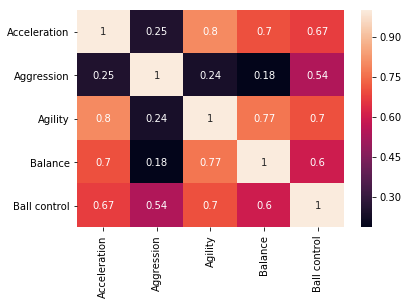

In [6]:
f = (
    footballers.loc[:, ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control']] # Se seleccionan unas pocas columnas de todo el conjunto
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan) #se convierten a nan (not a number) aquellas cadenas que no sean numéricas
        .dropna() # Se eliminan las no numéricas
).corr() # Se calcula la correlación entre las variables restantes

sns.heatmap(f, annot=True) # Se representa el mapa

Cada celda representa la correlación entre 2 variables (la proporción en la que ambas variables aumentan o disminuyen al mismo tiempo en las diferentes entradas). La correlación perfecta se representa por 1, mientras que la no correlación será 0.  
Según el color asignado, se puede comprobar que tendrá mayor o menor relación. En el ejemplo, la mejor correlación la podemos observar entre "Agility" y "Acceleration" (0.8) y la peor entre "Balance" y "Agresión" (0.18).

El mapa de correlación es el ejemplo más utilizado de los mapas de calor (o heatmaps). Se caracterizan por representar 2 dimensiones y emplear el color de cada celda para representar otra tercera. Los gráficos hexagonales (vistos anteriormente) funcionan de manera similar.

### Coordenadas Paralelas

Otra forma de representar cambios entre muchas variables son los gráficos de coordenadas paralelas.

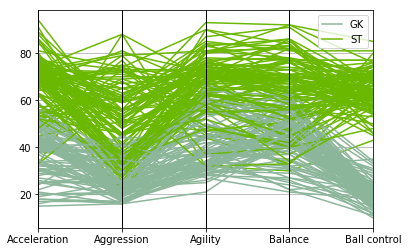

In [7]:
from pandas.plotting import parallel_coordinates

f = (
    footballers.iloc[:, 12:17] # se seleccionan por columnas las 5 variables que interesan (columnas 12 a 17)
        .loc[footballers['Position'].isin(['ST', 'GK'])] # se selecciona por filas los jugadores de "Position" "ST" y "GK"
        .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan) # se convienten a valores enteros
        .dropna() # se eliminan los valores erroneos
)
f['Position'] = footballers['Position']
f = f.sample(200) # se seleccionan 200 aleatoriamente

parallel_coordinates(f, 'Position')

En el gráfico se representa una muestra de 200 porteros (GK) y delanteros (ST) comparando las 5 variables de interés ya mencionadas.

Las coordenadas paralelas permiten distinguir muy bien como de diferentes son las clases o tipos de datos en el caso de estudio. En el ejemplo, se puede ver que los delanteros tienen, de manera casi uniforme, mayores puntuaciones que los porteros en las variables que hemos seleccionado. Por lo tanto, estas dos clases de jugadores se pueden distinguir muy bien empleando éstas variables.